调用包、读取数据、预处理、搭建模型、训练模型、测试模型、可视化

In [2]:
# 载入需要用到的包和数据
%config InlineBackend.figure_format = 'retina'
import tensorflow as tf
import idx2numpy
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 读取数据
x_train = idx2numpy.convert_from_file('./DataSets/mnist/train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('./DataSets/mnist/train-labels.idx1-ubyte')
x_test = idx2numpy.convert_from_file('./DataSets/mnist/t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('./DataSets/mnist/t10k-labels.idx1-ubyte')
text_labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']

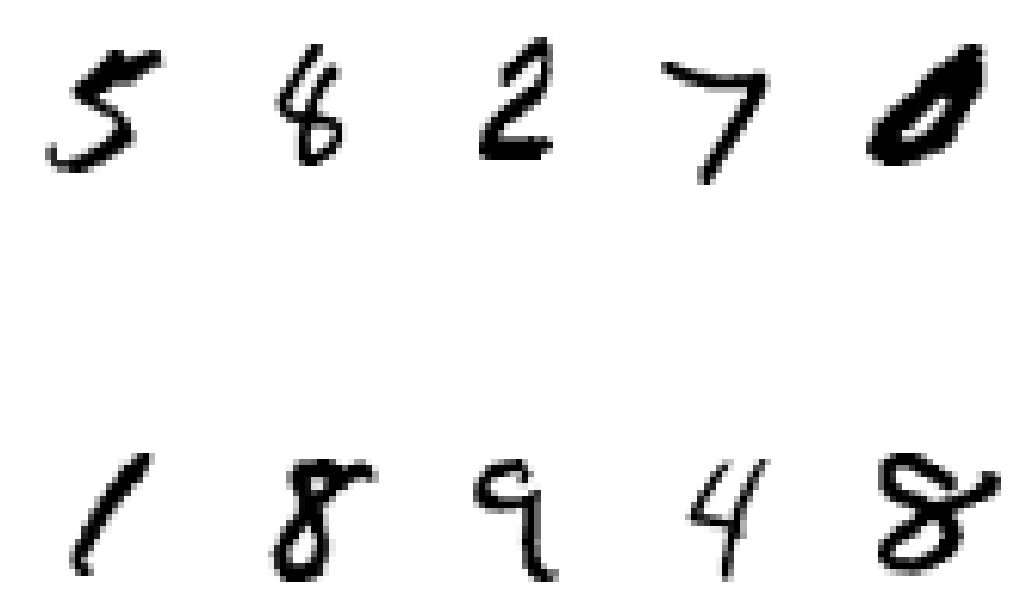

In [12]:
# 展示MNIST数据集中的一部分图片
num_images_to_show = 10
indices = np.random.choice(len(train_images), num_images_to_show, replace=False)

for i in range(num_images_to_show):
    image_to_show = train_images[indices[i]]

    # 转换为灰度图像
    gray_image = np.mean(image_to_show, axis=2).astype('float64')

    # 标准化
    normalized_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))

    # 显示图像
    plt.subplot(2, 5, i + 1)
    plt.imshow(normalized_image, cmap=plt.cm.binary)
    plt.axis('off')

plt.show()

In [4]:
# 预处理
train_images = x_train.reshape(-1,28,28,1)/255
train_labels = y_train
# 打乱顺序
index = np.arange(len(train_images))
np.random.shuffle(index)
# 验证数据
valid_images = train_images[index[-10000:]]
valid_labels = train_labels[index[-10000:]]
# 训练数据
train_images, train_labels = train_images[index[:50000]], train_labels[index[:50000]]
# 测试数据
test_images = x_test.reshape(len(x_test),28,28,1)/255
test_labels = y_test

In [5]:
# 搭建模型
mnist_cnn_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(28,28,1)), \
                                             tf.keras.layers.MaxPooling2D(pool_size=(2,2)), \
                                             tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), \
                                             tf.keras.layers.MaxPooling2D((2,2)), \
                                             tf.keras.layers.Flatten(), \
                                             tf.keras.layers.Dense(128,activation='relu'), \
                                             tf.keras.layers.Dense(10,activation='softmax')])
mnist_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [6]:
# 训练模型
mnist_cnn_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mnist_cnn_history = mnist_cnn_model.fit(train_images, train_labels, epochs=5, batch_size = 128, validation_data=(valid_images,valid_labels))

Epoch 1/5
391/391 [==============================] - 12s 29ms/step - loss: 0.2190 - accuracy: 0.9347 - val_loss: 0.0694 - val_accuracy: 0.9787
Epoch 2/5
391/391 [==============================] - 11s 29ms/step - loss: 0.0621 - accuracy: 0.9808 - val_loss: 0.0516 - val_accuracy: 0.9851
Epoch 3/5
391/391 [==============================] - 11s 29ms/step - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.0564 - val_accuracy: 0.9812
Epoch 4/5
391/391 [==============================] - 11s 28ms/step - loss: 0.0303 - accuracy: 0.9903 - val_loss: 0.0421 - val_accuracy: 0.9870
Epoch 5/5
391/391 [==============================] - 12s 30ms/step - loss: 0.0230 - accuracy: 0.9924 - val_loss: 0.0358 - val_accuracy: 0.9888


In [7]:
# 测试模型
mnist_cnn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0296 - accuracy: 0.9902


[0.029636690393090248, 0.9901999831199646]

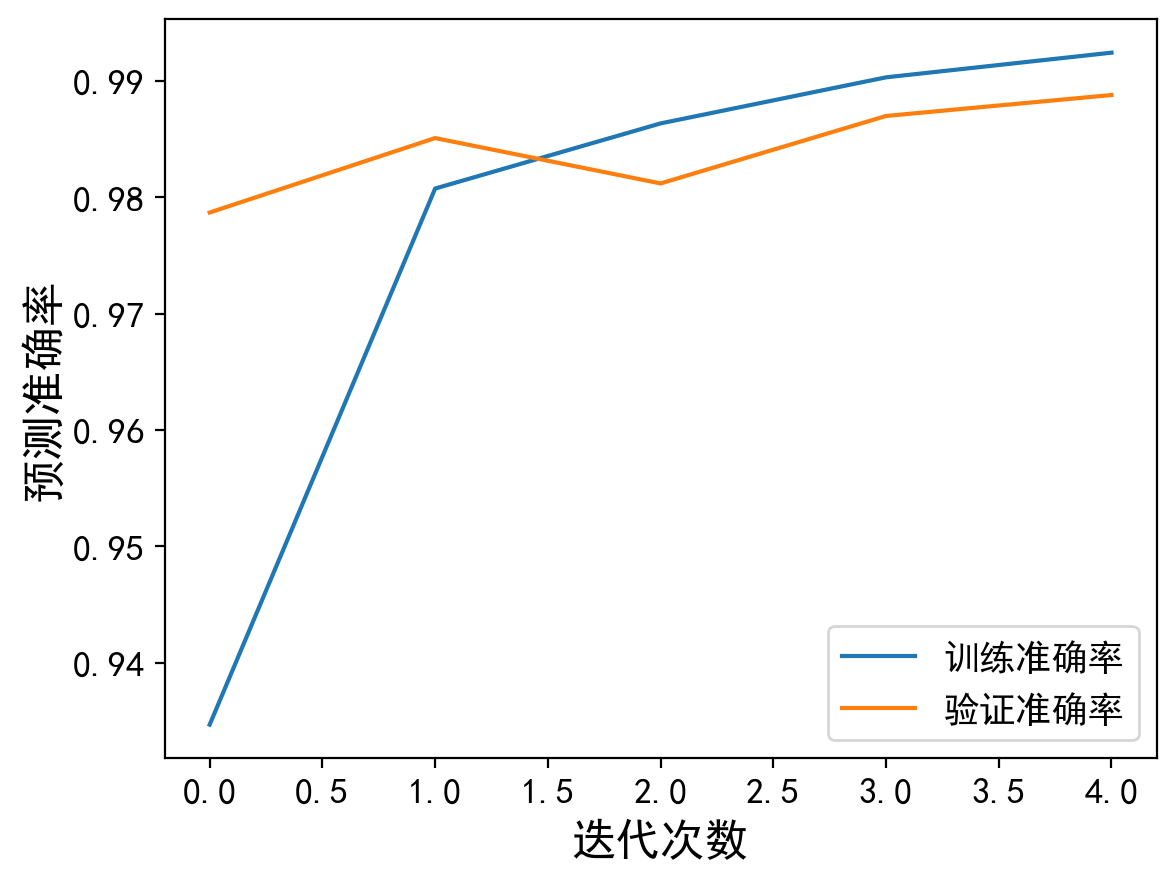

In [8]:
# 可视化
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签

plt.plot(mnist_cnn_history.epoch, mnist_cnn_history.history['accuracy'], label="训练准确率")
plt.plot(mnist_cnn_history.epoch, mnist_cnn_history.history['val_accuracy'], label="验证准确率")

plt.xlabel("迭代次数",fontsize=16)
plt.ylabel("预测准确率",fontsize=16)
_ = plt.legend(fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [13]:
# 预测
predictions = mnist_cnn_model.predict(test_images)
predictions.shape

313/313 [==============================] - 1s 4ms/step


(10000, 10)

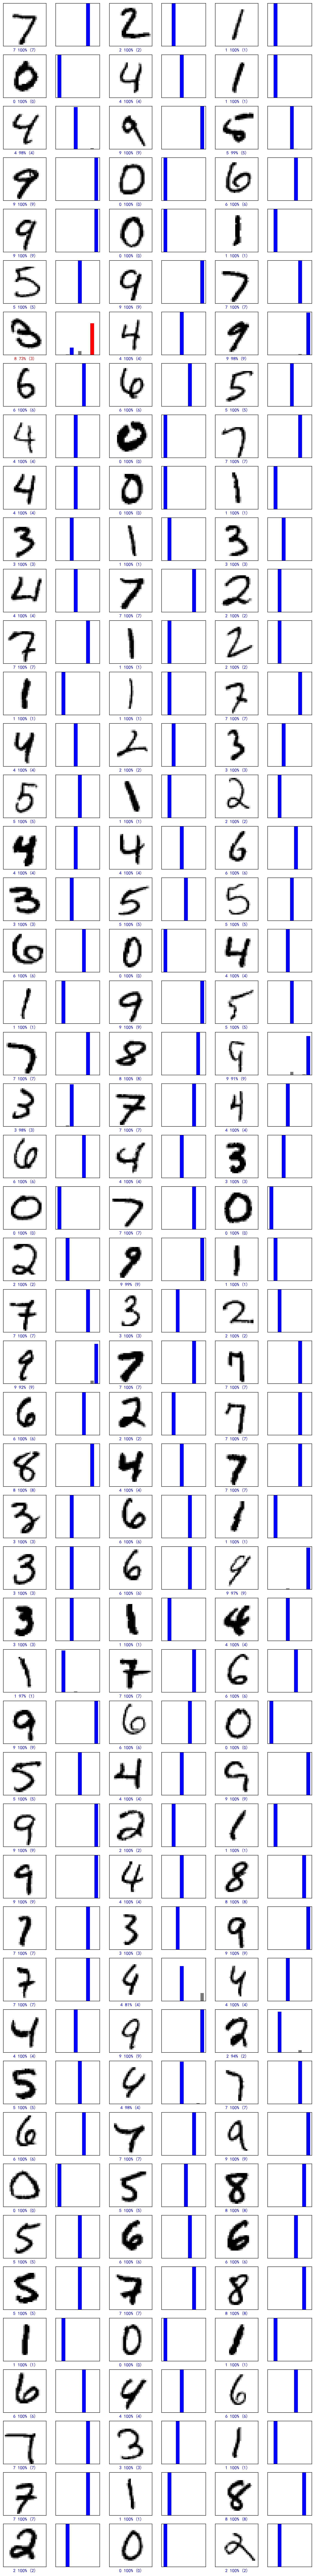

In [14]:
# 定义函数plot_image，用于绘制图片
def plot_image(i, predictions_array, true_label, img):
    # 获取预测结果
    predictions_array = predictions_array[i]
    # 获取真实标签
    true_label = true_label[i]
    # 获取图片
    img =img[i]
    
    # 设置图片的网格
    plt.grid(False)
    # 设置x轴标签
    plt.xticks([])
    # 设置y轴标签
    plt.yticks([])
    
    # 绘制图片
    plt.imshow(img, cmap=plt.cm.binary)
    
    # 获取预测标签
    predicted_label = np.argmax(predictions_array)
    # 如果预测标签和真实标签相同，则设置颜色为蓝色
    if predicted_label == true_label:
        color = 'blue'
    # 否则设置颜色为红色
    else:
        color = 'red'
        
    # 绘制预测标签
    plt.xlabel("{} {:2.0f}% ({})".format(text_labels[predicted_label],100*np.max(predictions_array),text_labels[true_label]), color=color)
    
    
# 定义函数plot_value_array，用于绘制预测结果
def plot_value_array(i,predictions_array, true_label):
    # 获取预测结果
    predictions_array = predictions_array[i]
    # 获取真实标签
    true_label = true_label[i]
    
    # 设置图片的网格
    plt.grid(False)
    # 设置x轴标签
    plt.xticks([])
    # 设置y轴标签
    plt.yticks([])
    # 绘制预测结果
    thisplot = plt.bar(range(10),predictions_array,color="#777777")
    
    # 设置y轴范围
    plt.ylim([0,1])
    # 获取预测标签
    predicted_label = np.argmax(predictions_array)
    
    # 设置预测标签的颜色
    thisplot[predicted_label].set_color('red')
    # 设置真实标签的颜色
    thisplot[true_label].set_color('blue')
    

# 设置图片的行数和列数
num_rows = 50
num_cols = 3
# 计算图片的数量
num_images = num_rows*num_cols
# 设置图片的尺寸
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
# 遍历图片
for i in range(num_images):
    # 绘制图片
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    # 绘制预测结果
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)
# 显示图片
plt.show()